In [1]:
import pandas as pd
import numpy as np

## 1. Criando nosso próprio DataFrame

Vamos começar criando uma lista (e então uma Series) contendo os nomes dos livros do John Green.

[**pandas.Series**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [2]:
livros_jg = ['Quem é Você, Alasca?', 'O Teorema Katherine', 'Deixe a Neve Cair',
             'Cidades de Papel', 'Will e Will', 'A Culpa É das Estrelas']

livros_jg_series = pd.Series(livros_jg)

livros_jg_series

0      Quem é Você, Alasca?
1       O Teorema Katherine
2         Deixe a Neve Cair
3          Cidades de Papel
4               Will e Will
5    A Culpa É das Estrelas
dtype: object

Agora utilizemos a estrutura de datas do Python. O pandas nos fornece um método muito útil para converter datas de strings para esse formato.

[**pandas.to_datetime**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [3]:
datas = pd.to_datetime(['03/03/2005', '21/09/2006', '02/10/2008',
                        '16/10/2008', '06/04/2010', '10/01/2012'], dayfirst=True)
datas_series = pd.Series(datas)

datas_series

0   2005-03-03
1   2006-09-21
2   2008-10-02
3   2008-10-16
4   2010-04-06
5   2012-01-10
dtype: datetime64[ns]

Agora uma Series de booleanos.

In [4]:
lidos = pd.Series([True, False, False, True, True, False])
lidos

0     True
1    False
2    False
3     True
4     True
5    False
dtype: bool

E duas Series de floats. Note que na primeira estou utilizando o NaN do NumPy. O pandas irá reconhecer isso como um valor nulo.

In [5]:
minha_nota = pd.Series([5, np.nan, np.nan, 4.5, 4, np.nan])
minha_nota

0    5.0
1    NaN
2    NaN
3    4.5
4    4.0
5    NaN
dtype: float64

In [6]:
nota_gr = pd.Series([4.02, 3.57, 3.76, 3.80, 3.77, 4.21])
nota_gr

0    4.02
1    3.57
2    3.76
3    3.80
4    3.77
5    4.21
dtype: float64

Agora podemos formar um DataFrame. Esta é só uma das várias maneiras de se fazer isso, os elementos não precisariam ser Series, por exemplo.

[**pandas.DataFrame**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [7]:
df = pd.DataFrame({'livro': livros_jg_series, 'data_publicacao': datas,
                   'lido': lidos, 'minha_nota': minha_nota,
                   'nota_goodreads': nota_gr})
df

,livro,data_publicacao,lido,minha_nota,nota_goodreads
0,"Quem é Você, Alasca?",2005-03-03,True,5.0,4.02
1,O Teorema Katherine,2006-09-21,False,NaN,3.57
2,Deixe a Neve Cair,2008-10-02,False,NaN,3.76
3,Cidades de Papel,2008-10-16,True,4.5,3.80
4,Will e Will,2010-04-06,True,4.0,3.77
5,A Culpa É das Estrelas,2012-01-10,False,NaN,4.21


Opa! Esqueci de um livro. vamos adicioná-lo. Perceba que aqui estou criando uma Series para utilizar como **linha**, e não como coluna como fizemos anteriormente.

In [8]:
tartarugas = pd.Series({'livro':'Tartarugas Até Lá Embaixo', 'data_publicacao': pd.to_datetime('10/10/2017'),
           'lido': True, 'minha_nota': 4.5, 'nota_goodreads': 3.95})
tartarugas

livro              Tartarugas Até Lá Embaixo
data_publicacao          2017-10-10 00:00:00
lido                                    True
minha_nota                               4.5
nota_goodreads                          3.95
dtype: object

Agora é só dar um append e tá pronto o sorvetinho.

[**pandas.DataFrame.append**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html)

In [9]:
df = df.append(tartarugas, ignore_index=True)
df

,livro,data_publicacao,lido,minha_nota,nota_goodreads
0,"Quem é Você, Alasca?",2005-03-03,True,5.0,4.02
1,O Teorema Katherine,2006-09-21,False,NaN,3.57
2,Deixe a Neve Cair,2008-10-02,False,NaN,3.76
3,Cidades de Papel,2008-10-16,True,4.5,3.80
4,Will e Will,2010-04-06,True,4.0,3.77
5,A Culpa É das Estrelas,2012-01-10,False,NaN,4.21
6,Tartarugas Até Lá Embaixo,2017-10-10,True,4.5,3.95


## 2. Análise exploratória

Vamos começar indexando uma coluna.

In [10]:
df['livro']

0         Quem é Você, Alasca?
1          O Teorema Katherine
2            Deixe a Neve Cair
3             Cidades de Papel
4                  Will e Will
5       A Culpa É das Estrelas
6    Tartarugas Até Lá Embaixo
Name: livro, dtype: object

E duas ou mais?

In [11]:
df[['data_publicacao','livro']]

,data_publicacao,livro
0,2005-03-03,"Quem é Você, Alasca?"
1,2006-09-21,O Teorema Katherine
2,2008-10-02,Deixe a Neve Cair
3,2008-10-16,Cidades de Papel
4,2010-04-06,Will e Will
5,2012-01-10,A Culpa É das Estrelas
6,2017-10-10,Tartarugas Até Lá Embaixo


E se eu quiser a linha 5 e 6, mas só os nomes e a informação se eu li ou não?

[**pandas.DataFrame.loc**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

PS: o slicing funciona diferente no pandas. O intervalo é inclusivo, o que significa que o valor de final também entra.

In [12]:
df.loc[5:6, ['livro', 'lido']]

,livro,lido
5,A Culpa É das Estrelas,False
6,Tartarugas Até Lá Embaixo,True


Usando inteiros...

[**pandas.DataFrame.iloc**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

In [13]:
df.iloc[:, [1,0]]

,data_publicacao,livro
0,2005-03-03,"Quem é Você, Alasca?"
1,2006-09-21,O Teorema Katherine
2,2008-10-02,Deixe a Neve Cair
3,2008-10-16,Cidades de Papel
4,2010-04-06,Will e Will
5,2012-01-10,A Culpa É das Estrelas
6,2017-10-10,Tartarugas Até Lá Embaixo


In [40]:
df['nota_goodreads']

0    4.02
1    3.57
2    3.76
3    3.80
4    3.77
5    4.21
6    3.95
Name: nota_goodreads, dtype: float64

Indexação booleana. Basicamente mapear o nosso dataframe baseado em uma condição.

In [14]:
df['nota_goodreads'] >= 3.80

0     True
1    False
2    False
3     True
4    False
5     True
6     True
Name: nota_goodreads, dtype: bool

In [15]:
df[df['nota_goodreads'] >= 3.80]

,livro,data_publicacao,lido,minha_nota,nota_goodreads
0,"Quem é Você, Alasca?",2005-03-03,True,5.0,4.02
3,Cidades de Papel,2008-10-16,True,4.5,3.80
5,A Culpa É das Estrelas,2012-01-10,False,NaN,4.21
6,Tartarugas Até Lá Embaixo,2017-10-10,True,4.5,3.95


In [16]:
df[df['lido']]

,livro,data_publicacao,lido,minha_nota,nota_goodreads
0,"Quem é Você, Alasca?",2005-03-03,True,5.0,4.02
3,Cidades de Papel,2008-10-16,True,4.5,3.80
4,Will e Will,2010-04-06,True,4.0,3.77
6,Tartarugas Até Lá Embaixo,2017-10-10,True,4.5,3.95


Agora vamos ver as informações gerais do nosso dataframe. O método info é muito útil para mostrar os tipos de dados que estamos trabalhando, assim como a quantidade de valores nulos.

[**pandas.DataFrame.info**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   livro            7 non-null      object        
 1   data_publicacao  7 non-null      datetime64[ns]
 2   lido             7 non-null      bool          
 3   minha_nota       4 non-null      float64       
 4   nota_goodreads   7 non-null      float64       
dtypes: bool(1), datetime64[ns](1), float64(2), object(1)
memory usage: 267.0+ bytes


Medidas estatísticas básicas para os valores numéricos.

[**pandas.DataFrame.describe**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [18]:
df.describe()

,minha_nota,nota_goodreads
count,4.000000,7.000000
mean,4.500000,3.868571
std,0.408248,0.208761
min,4.000000,3.570000
25%,4.375000,3.765000
50%,4.500000,3.800000
75%,4.625000,3.985000
max,5.000000,4.210000


Também pode ser aplicado em Series!

[**pandas.Series.describe**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html)

In [19]:
df['nota_goodreads'].describe()

count    7.000000
mean     3.868571
std      0.208761
min      3.570000
25%      3.765000
50%      3.800000
75%      3.985000
max      4.210000
Name: nota_goodreads, dtype: float64

Um uso do groupby. A explicação vai ter que ficar para um outro momento...

[**pandas.DataFrame.groupby**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [20]:
df.groupby(by=df['lido'])['nota_goodreads'].describe()

,count,mean,std,min,25%,50%,75%,max
lido,,,,,,,,
False,3.0,3.846667,0.328684,3.57,3.6650,3.760,3.9850,4.21
True,4.0,3.885000,0.119583,3.77,3.7925,3.875,3.9675,4.02


Yay, correlação de Pearson!

[**pandas.Dataframe.corr**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [21]:
df[['minha_nota', 'nota_goodreads']].corr()

,minha_nota,nota_goodreads
minha_nota,1.000000,0.853486
nota_goodreads,0.853486,1.000000


### Yay, gráficos!

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='nota_goodreads'>

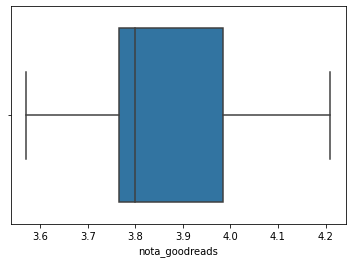

In [35]:
sns.boxplot(x=df['nota_goodreads'])

In [ ]:
sns.catplot(x='minha_nota', y='nota_goodreads', hue='lido', data=df)

Vamos pegar nossa matriz de correlação...

In [37]:
df[['minha_nota', 'nota_goodreads']].corr()

,minha_nota,nota_goodreads
minha_nota,1.000000,0.853486
nota_goodreads,0.853486,1.000000


E passar para um gráfico!

<AxesSubplot:>

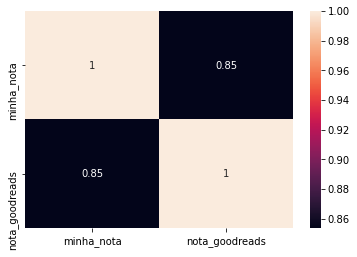

In [38]:
sns.heatmap(df[['minha_nota', 'nota_goodreads']].corr(), annot=True)

O pairplot também pode ser muito útil em visualizar pares de variáveis.

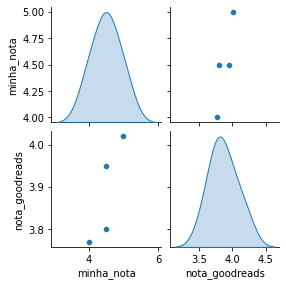

In [39]:
_ = sns.pairplot(df[['minha_nota', 'nota_goodreads']], height=2, diag_kind="kde")